In [1]:
using PyPlot

## Tarea

* Pensar en una generalizacion de la esfera de Bloch para un qutrit (sistema de 3 niveles) y para un sistema de dos qubits. Programar una rutina que efectue dicho calculo. 


# Qubits y la esfera de Bloch

Un qutrit es un sistema de tres niveles. Por lo mismo, vamos a poder representarlo como  
$$|\psi\rangle = \alpha |0\rangle + \beta |1\rangle + \gamma |2\rangle$$
donde se tiene la condición de normalización 
$$\langle\psi|\psi\rangle = |\alpha|^2 +|\beta|^2 + |\gamma|^2 =1.$$
La base $|0\rangle$, $|1\rangle$ y $|2\rangle$ es la base de los qutrits. Así como un sistema de dos niveles utiliza \textbf{$H_2$}, en este caso se utilizará el espacio \textbf{$H_3$}


## Matrices Gell-Mann
$$
\lambda_1=
\begin{pmatrix}
  0 & 1 & 0 \\
  1 & 0 & 0 \\
  0 & 0 & 0
 \end{pmatrix},\quad
\lambda_2=
\begin{pmatrix}
  0 & -i & 0 \\
  i &  0 & 0 \\
  0 & 0 & 0
\end{pmatrix},\quad
\lambda_3=
\begin{pmatrix}
  1 &  0 & 0 \\
  0 & -1 & 0 \\
  0 & 0 & 0
\end{pmatrix} ,\quad
\lambda_4=
\begin{pmatrix}
  0 &  0 & 1 \\
  0 &  0 & 0 \\
  1 & 0 & 0
\end{pmatrix},\quad
\lambda_5=
\begin{pmatrix}
  0 &  0 & -i \\
  0 &  0 & 0 \\
  i & 0 & 0
\end{pmatrix},\quad
\lambda_6=
\begin{pmatrix}
  0 &  0 & 0 \\
  0 &  0 & 1 \\
  0 & 1 & 0
\end{pmatrix},\quad
\\
\lambda_7=
\begin{pmatrix}
  0 &  0 & 0 \\
  0 &  0 & i \\
  0 & -i & 0
\end{pmatrix},\quad
\lambda_4=
\frac{1}{\sqrt{3}}
\begin{pmatrix}
  1 &  0 & 0 \\
  0 &  1 & 0 \\
  0 & 0 & -2
\end{pmatrix}.
$$

https://arxiv.org/pdf/1111.4427v2.pdf


Para el caso de dos qubits es necesario un sistema de 4 niveles. https://arxiv.org/pdf/1602.01548v3.pdf 

Esto se debe a que tendríamos algo de la forma:

$$|\psi\rangle = a_{11} |11\rangle + a_{00} |00\rangle + a_{10} |10\rangle+ a_{01} |01\rangle$$
con la condición $$\langle\psi|\psi\rangle = |a_{11}|^2 +|a_{00}|^2 + |a_{10}|^2 + |a_{01}|^2 =1.$$

In [2]:
lambda_1=[0. 1. 0.; 1. 0. 0.; 0. 0. 0];
lambda_2=[0. -im 0.; im 0. 0.; 0. 0. 0];
lambda_3=[1. 0. 0.; 0. -1. 0.; 0. 0. 0];
lambda_4=[0. 0. 1.; 0. 0. 0.; 1. 0. 0];
lambda_5=[0. 0. -im; 0. 0. 0.; im 0. 0];
lambda_6=[0. 0. 0.; 0. 0. 1.; 0. 1. 0];
lambda_7=[0. 0. 0.; 0. 0. im; 0. -im 0];
lambda_8=(1/(3)^(1/2))*[1. 0. 0.; 0. 1. 0.; 0. 0. -2];
lambdas=Array[lambda_1, lambda_2, lambda_3, lambda_4, lambda_5, lambda_6, lambda_7, lambda_8];

In [3]:
for iter in eachindex(lambdas)
    lambda=lambdas[iter]
    @show iter
    @show norm(lambda*lambda-eye(3))
    @show norm(lambda*lambda'-eye(3))
    @show trace(lambda) #se prueba la traza es cero
    @show ishermitian(lambda) #se prueba hermiticidad
end

iter = 1
norm(lambda * lambda - eye(3)) = 1.0
norm(lambda * lambda' - eye(3)) = 1.0
trace(lambda) = 0.0
ishermitian(lambda) = true
iter = 2
norm(lambda * lambda - eye(3)) = 1.0
norm(lambda * lambda' - eye(3)) = 1.0
trace(lambda) = 0.0 + 0.0im
ishermitian(lambda) = true
iter = 3
norm(lambda * lambda - eye(3)) = 1.0
norm(lambda * lambda' - eye(3)) = 1.0
trace(lambda) = 0.0
ishermitian(lambda) = true
iter = 4
norm(lambda * lambda - eye(3)) = 1.0
norm(lambda * lambda' - eye(3)) = 1.0
trace(lambda) = 0.0
ishermitian(lambda) = true
iter = 5
norm(lambda * lambda - eye(3)) = 1.0
norm(lambda * lambda' - eye(3)) = 1.0
trace(lambda) = 0.0 + 0.0im
ishermitian(lambda) = true
iter = 6
norm(lambda * lambda - eye(3)) = 1.0
norm(lambda * lambda' - eye(3)) = 1.0
trace(lambda) = 0.0
ishermitian(lambda) = true
iter = 7
norm(lambda * lambda - eye(3)) = 1.0
norm(lambda * lambda' - eye(3)) = 1.0
trace(lambda) = 0.0 + 0.0im
ishermitian(lambda) = true
iter = 8
norm(lambda * lambda - eye(3)) = 0.666666666666666

Otra de las características de las matrices anteriores es la siguiente:
$$tr(\lambda_i \lambda_j) = 2\delta_{i,j}$$

Se probará a continuación.

In [4]:
#Con lo siguiente veremos la propiedad de la traza de las matrices de Gell-Mann
for i in 1:length(lambdas), j in 1:length(lambdas)
    if !=(i,j)
        @show i
        @show j
        @show trace(lambdas[i]*lambdas[j])
    else
        @show i
        @show j
        @show trace(lambdas[i]*lambdas[j])
    end
end

i = 1
j = 1
trace(lambdas[i] * lambdas[j]) = 2.0
i = 1
j = 2
trace(lambdas[i] * lambdas[j]) = 0.0 + 0.0im
i = 1
j = 3
trace(lambdas[i] * lambdas[j]) = 0.0
i = 1
j = 4
trace(lambdas[i] * lambdas[j]) = 0.0
i = 1
j = 5
trace(lambdas[i] * lambdas[j]) = 0.0 + 0.0im
i = 1
j = 6
trace(lambdas[i] * lambdas[j]) = 0.0
i = 1
j = 7
trace(lambdas[i] * lambdas[j]) = 0.0 + 0.0im
i = 1
j = 8
trace(lambdas[i] * lambdas[j]) = 0.0
i = 2
j = 1
trace(lambdas[i] * lambdas[j]) = 0.0 + 0.0im
i = 2
j = 2
trace(lambdas[i] * lambdas[j]) = 2.0 + 0.0im
i = 2
j = 3
trace(lambdas[i] * lambdas[j]) = 0.0 + 0.0im
i = 2
j = 4
trace(lambdas[i] * lambdas[j]) = 0.0 + 0.0im
i = 2
j = 5
trace(lambdas[i] * lambdas[j]) = 0.0 + 0.0im
i = 2
j = 6
trace(lambdas[i] * lambdas[j]) = 0.0 + 0.0im
i = 2
j = 7
trace(lambdas[i] * lambdas[j]) = 0.0 + 0.0im
i = 2
j = 8
trace(lambdas[i] * lambdas[j]) = 0.0 + 0.0im
i = 3
j = 1
trace(lambdas[i] * lambdas[j]) = 0.0
i = 3
j = 2
trace(lambdas[i] * lambdas[j]) = 0.0 + 0.0im
i = 3
j = 3
trace(lamb

In [5]:
#Usaremos las siguientes funciones

function projector(state)
    return state*state'
end

"""
Esta función crea un estado cuántico aleatorio. La dimension por defecto es 2. 
"""
function random_state(dim=3) #Ahora requerimos tres dimensiones
    v=randn(1,dim)+randn(1,dim)im
    v=v/norm(v)
    return v'
end

psi=random_state()

"""
Function that takes a pure 2-level state and returns the Bloch sphere representation 
"""
#ahora será a pure 3-level state

function stateToBloch(psi::Array)
    lista = Float64[]
    for lambda in lambdas
        push!(lista, real(trace(lambda*projector(psi))))
    end
    lista
end

@show psi
@show stateToBloch(psi)

psi = Complex{Float64}[0.0336381+0.0142844im; -0.67551+0.65221im; -0.00346988+0.341995im]
stateToBloch(psi) = [-0.0268128,0.0631767,-0.880356,0.00953697,0.0231072,0.450793,0.457516,0.374748]


8-element Array{Float64,1}:
 -0.0268128 
  0.0631767 
 -0.880356  
  0.00953697
  0.0231072 
  0.450793  
  0.457516  
  0.374748  


* Compare el calculo de la traza de un operador hermitico aleatorio exacto con el valor esperado con respecto a un solo estado aleatorio:
  * Construya un operador aleatorio hermítico, partiendo de un arreglo de $n\times n$ de números aleatorios complejos (sea esa matriz $A$). El observable a usar será $H=A+A^\dagger$ (muestre numérica que efectivamente es hermítico.
  * Use un estado aleatorio de la dimension correspondiente para calcular el valor esperado.
  * Compare con el valor de $\text{tr} H$. Debe ser muy cercano, cuando lo dividimos por la dimension del sistema. 
  * Calcule la diferencia como función de la dimensión del sistema y grafiquelo. 
  * Repita el ejercicio para una familia de operadores que varien con la dimensión pero que sean acotados (el espectro debe permanecer acotado a medida que la dimensión aumenta).


In [32]:
function Obs_Hermitian(n)
    #construimos primero una matriz cuadrada, nxn , con entradas en los complejos. 
    a=rand(n,n)+1im*rand(n,n)
    #Posteriormente se utiliza la función triu(a,1) para obtener la matriz triangular superior 
    #a partir de la entrada 1
    b=triu(a,1)
    #Se construye la matriz M, la cual toma b (matriz triangular superior)+la transpuesta conjugada de b 
    #(es decir una matriz trian inferior) y luego le suma una diagonal rándom. 
    M=b+transpose(conj(b))+Diagonal(rand(n,n))
    #Construimos el observable H y se comprueba que sea hermítico. 
    H = M + M'
    #@show ishermitian(M)
    @show ishermitian(H)
    return H
end

Obs_Hermitian(4)

ishermitian(H) = true


4×4 Array{Complex{Float64},2}:
  0.56625+0.0im         0.35993+0.0307006im  …  0.113038+0.153552im
  0.35993-0.0307006im  0.666268+0.0im            1.13956+1.88674im 
  1.51079-1.28323im    0.643498-1.49981im        1.79845+1.79807im 
 0.113038-0.153552im    1.13956-1.88674im        1.81543+0.0im     


### ¿Que es un valor esperado?

El valor esperado de $A$ está dado por 
\begin{align}
\langle \psi| A |\psi\rangle &= \langle \psi|\sum_{ij}\alpha_{ij} |i\rangle\langle j|\sum_k c_k |k\rangle\\
 &= \langle \psi|\sum_{ij}\alpha_{ij} c_j|i\rangle \\
 &= \sum_k c_k^* \langle k| \sum_{ij}\alpha_{ij} c_j|i\rangle \\
 &= \sum_{ij} c_i^*\alpha_{ij} c_j.
\end{align}

Notemos que el valor esperado tambien se puede expresar como la traza del observable por el proyector correspondiente al estado:
\begin{align}
\text{tr} |\psi\rangle\langle \psi| A &= \text{tr} \sum_{ij} c_j c_i^* |j\rangle\langle i| \sum_{kl}\alpha_{kl} |k\rangle\langle l|\\
&=\text{tr} \sum_{ijl}c_j c_i^* \alpha_{il}|j\rangle\langle l|\\
&=\text{tr} \sum_{ij}c_j c_i^* \alpha_{ij}\\
\end{align}
por lo que concluimos que 
$$
\langle \psi| A |\psi\rangle = \text{tr} |\psi\rangle\langle \psi| A.
$$
Esto nos permite establecer un lenguaje paralelo para las mediciones, usando proyectores. Vamos a poder generalizar esto mas adeltante a otras matrices de rango mayor. 

In [7]:
#Las funciones que usaremos ya quedaron definidas. Comprobamos que sea un proyector utilizando lo
# siguiente.

P=projector(random_state(4));
@show norm(P*P-P);
@show trace(P);

norm(P * P - P) = 6.028619681880512e-17
trace(P) = 0.9999999999999999 + 0.0im


In [8]:
#Calculamos el valor esperado como la traza del observable (H) por el proyector correspondiente al estado.
# n será la dimensión
function valor_esperado(n)
    Traza = (trace(Obs_Hermitian(n)))
    @show Traza
    @show Traza/n
    @show projector(n)
    @show Traza*projector(n)
    @show (Traza*projector(n))/n;
end

valor_esperado(4);

Traza = 3.6821516772410017 + 0.0im
Traza / n = 0.9205379193102504 + 0.0im
projector(n) = 16
Traza * projector(n) = 58.91442683585603 + 0.0im
(Traza * projector(n)) / n = 14.728606708964007 + 0.0im


Aparentemente lo anterior no se cumple. No veo ningún número cercano.

A continuación calcularé dichas diferencias de dos formas distintas, ya que la pregunta facilita diversas interpretaciones.

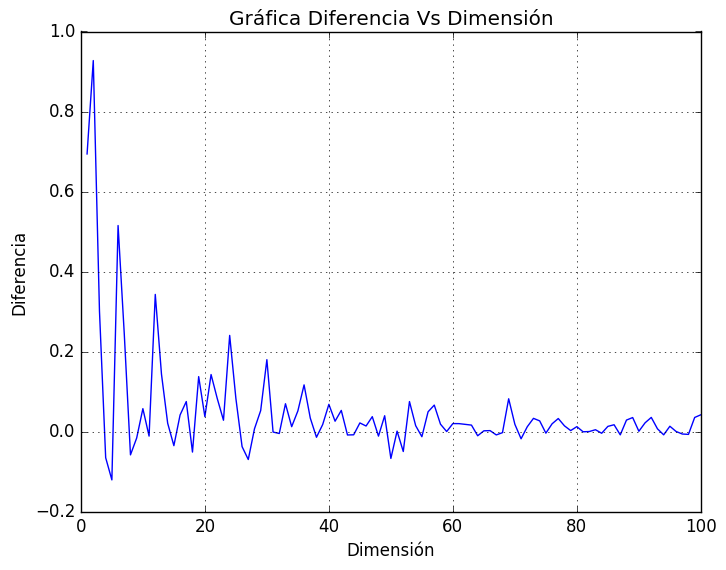

PyObject <matplotlib.text.Text object at 0x7fedb996b940>

In [30]:
function dif(n)
    ψ = projector(random_state(n))
    H = Obs_Hermitian(n)
    Tr = trace(ψ*H)
    (Tr-trace(H))
    real(Tr/n)
end
dif(50)
function graf_dif(n) 
    v = []
    x = collect(1:n)
    for i in x
    l = real(dif(i))
    push!(v,l)
    end
    plot(x,v)
    grid("on")
    xlabel("Dimensión")
    ylabel("Diferencia")
    title("Gráfica Diferencia Vs Dimensión")
end

graf_dif(100)

    

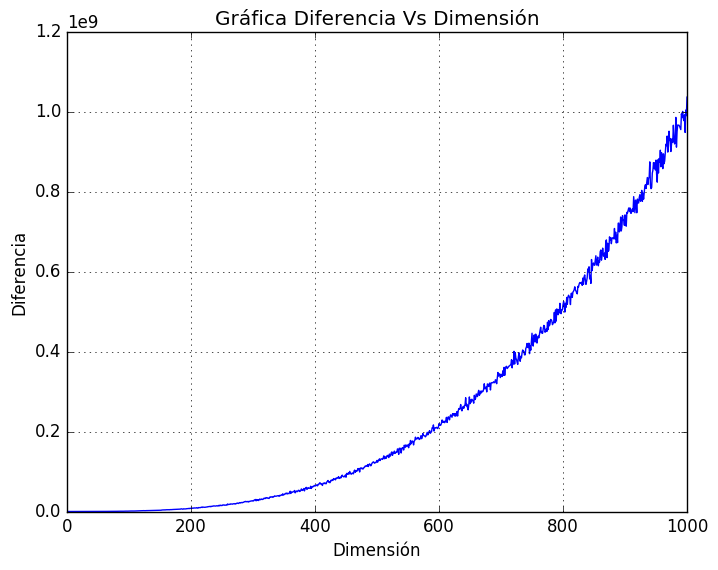

PyObject <matplotlib.text.Text object at 0x7fedb98d9160>

In [31]:
function diferencia(n)
    Traza = (trace(Obs_Hermitian(n)))
    ((Traza*projector(n)))-Traza/n
end

function graf_diferencia(n) 
    v = []
    x = collect(1:n)
    for i in x
    l = real(diferencia(i))
    push!(v,l)
    end
    plot(x,v)
    grid("on")
    xlabel("Dimensión")
    ylabel("Diferencia")
    title("Gráfica Diferencia Vs Dimensión")
end

graf_diferencia(1000)

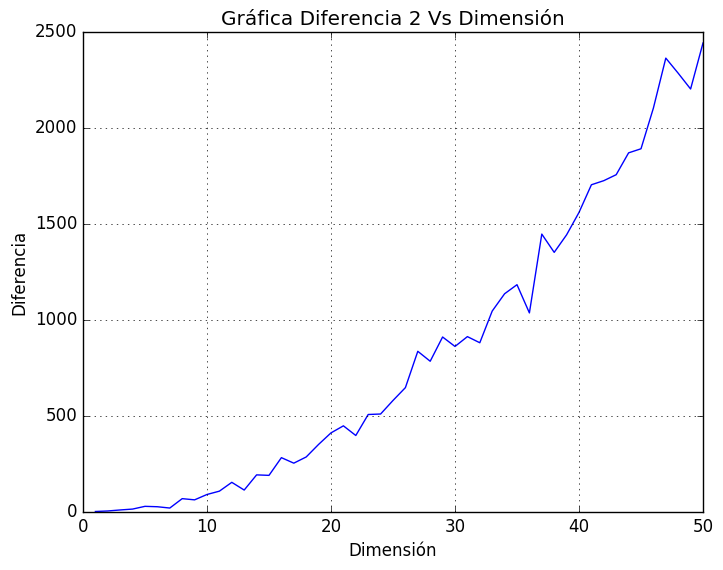

  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/nicolas/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/nicolas/.julia/v0.5/PyCall/sr

PyObject <matplotlib.text.Text object at 0x7fedbe951898>

In [11]:
function diferencia2(n)
    Traza = (trace(Obs_Hermitian(n)))
    ((Traza*projector(n))/n)-Traza
end

function graf_diferencia2(n) 
    v = []
    x = collect(1:n)
    for i in x
    l = real(diferencia2(i))
    push!(v,l)
    end
    plot(x,v)
    grid("on")
    xlabel("Dimensión")
    ylabel("Diferencia")
    title("Gráfica Diferencia 2 Vs Dimensión")
end

graf_diferencia2(50)

A pesar de tener dos cálculos distintos, ambas gráficas describen exponenciales.

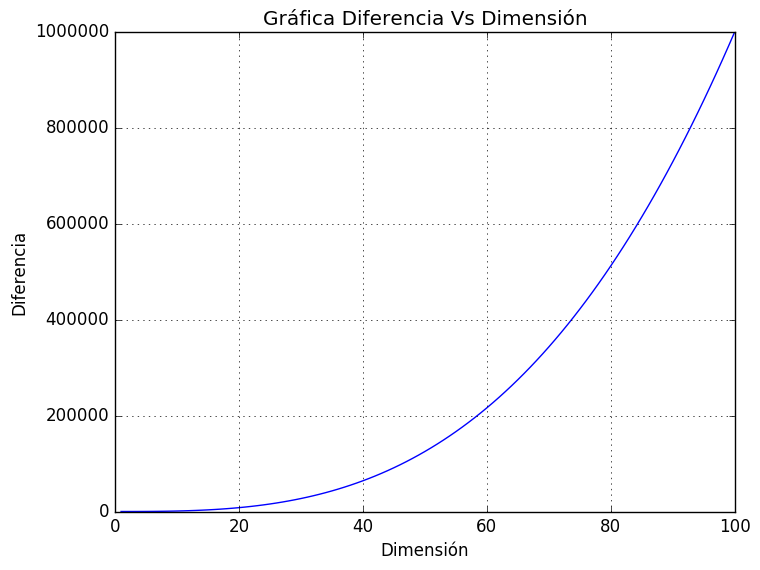

PyObject <matplotlib.text.Text object at 0x7fedbe7813c8>

In [15]:
function diferencia3(n)
    Traza = (trace(Obs_Hermitian(n)))
    (((Traza*projector(n)))/Traza)*n
end

function graf_diferencia3(n) 
    v = []
    x = collect(1:n)
    for i in x
    l = real(diferencia3(i))
    push!(v,l)
    end
    plot(x,v)
    grid("on")
    xlabel("Dimensión")
    ylabel("Diferencia")
    title("Gráfica Diferencia Vs Dimensión")
end
graf_diferencia3(100)